<a href="https://colab.research.google.com/github/pejmanrasti/traitement_des_signaux_M1/blob/main/2_Fourier_Transform_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fourier Transform of Signals**
In this notebook, we will explore the Fourier transform of continuous signals. The Fourier transform is used to analyze the frequency components of a non-periodic signal.

We will also showcase some important properties of the Fourier transform, including time-shifting, frequency scaling, and more.

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.constants import pi
from scipy.fft import fft, fftfreq, ifft
from IPython.display import display
from ipywidgets import interact

### **Simulated Signal Data**
We will simulate a Gaussian-modulated sinusoidal wave and explore its frequency components using the Fourier transform.

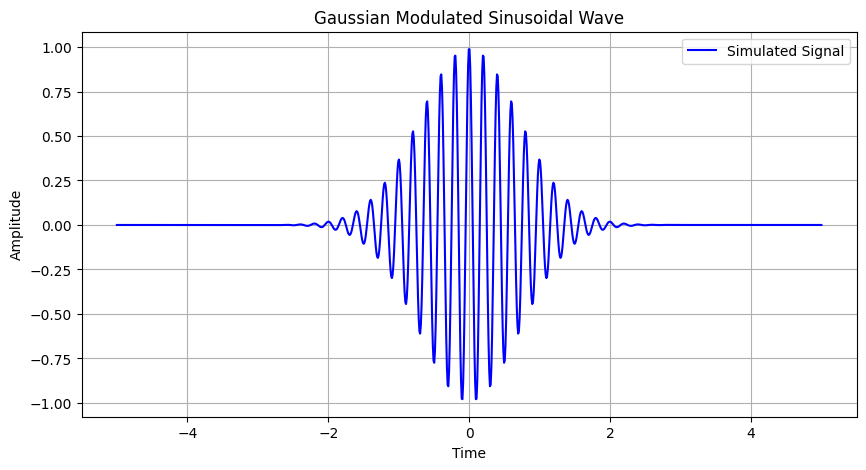

In [2]:
# Simulating signal data
t = np.linspace(-5, 5, 1000)
freq = 5  # Frequency of the sinusoidal wave
signal = np.cos(2 * np.pi * freq * t) * np.exp(-t**2)

# Plot the original signal
plt.figure(figsize=(10, 5))
plt.plot(t, signal, label='Simulated Signal', color='blue')
plt.title('Gaussian Modulated Sinusoidal Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### **Fourier Transform and Frequency Domain**
Now, let's calculate the Fourier transform of the signal and visualize the frequency components.

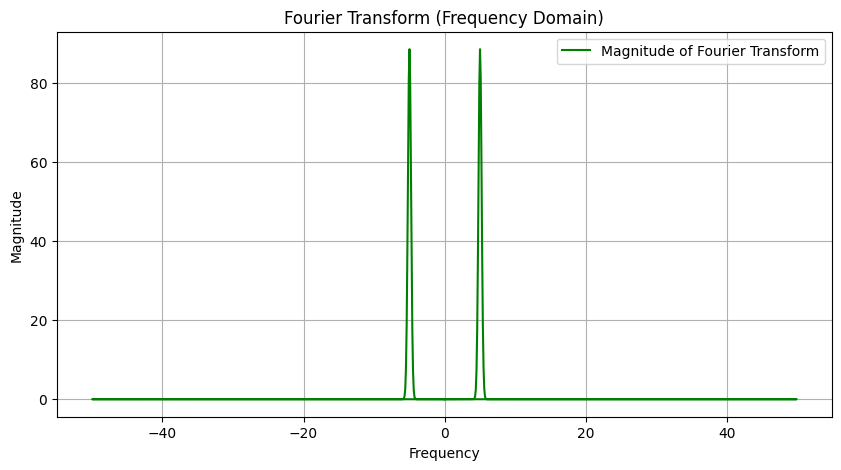

In [3]:
# Fourier Transform of the signal
signal_fft = fft(signal)
frequencies = fftfreq(len(t), t[1] - t[0])

# Plot the magnitude of the Fourier transform (power spectrum)
plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(signal_fft), label='Magnitude of Fourier Transform', color='green')
plt.title('Fourier Transform (Frequency Domain)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

### **Properties of Fourier Transform**
We will now explore some key properties of the Fourier transform, such as time-shifting and scaling in both the time and frequency domains.

In [4]:
# Time Shifting Property
def time_shifted_signal(shift):
    shifted_signal = np.cos(2 * np.pi * freq * (t - shift)) * np.exp(-(t - shift)**2)
    shifted_fft = fft(shifted_signal)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(t, shifted_signal, label=f'Shifted Signal (Shift = {shift})')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Time-Shifted Signal')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(frequencies, np.abs(shifted_fft), label='Fourier Transform')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('Frequency Domain (After Shift)')
    plt.grid(True)
    plt.legend()
    plt.show()

interact(time_shifted_signal, shift=widgets.FloatSlider(value=0, min=-2, max=2, step=0.1))

interactive(children=(FloatSlider(value=0.0, description='shift', max=2.0, min=-2.0), Output()), _dom_classes=…

<function __main__.time_shifted_signal(shift)>

### **Scaling in Time and Frequency Domain**
The Fourier transform of a signal scales in the opposite direction when the signal is compressed or stretched in time.

In [5]:
# Time Scaling Property
def time_scaled_signal(scale):
    scaled_signal = np.cos(2 * np.pi * freq * t * scale) * np.exp(-(t * scale)**2)
    scaled_fft = fft(scaled_signal)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(t, scaled_signal, label=f'Scaled Signal (Scale = {scale})')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Time-Scaled Signal')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(frequencies, np.abs(scaled_fft), label='Fourier Transform')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('Frequency Domain (After Scaling)')
    plt.grid(True)
    plt.legend()
    plt.show()

interact(time_scaled_signal, scale=widgets.FloatSlider(value=1, min=0.5, max=3, step=0.1))

interactive(children=(FloatSlider(value=1.0, description='scale', max=3.0, min=0.5), Output()), _dom_classes=(…

<function __main__.time_scaled_signal(scale)>

### **Inverse Fourier Transform**
Finally, let's reconstruct the original signal using the inverse Fourier transform.

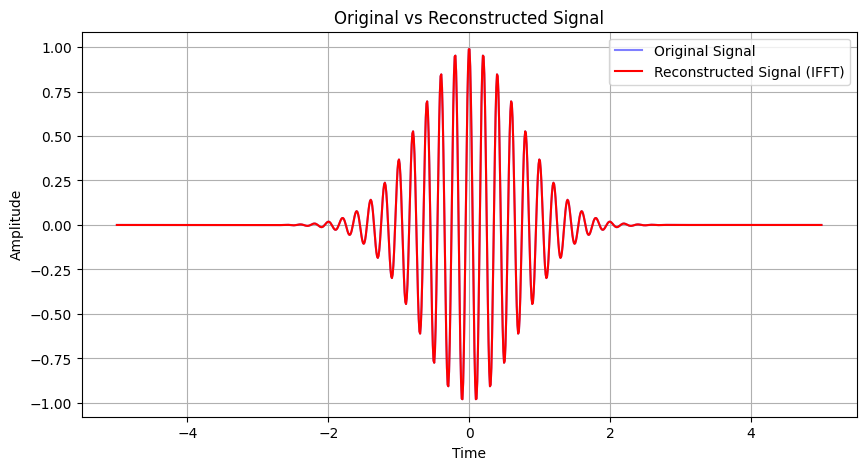

In [6]:
# Inverse Fourier Transform
reconstructed_signal = ifft(signal_fft)

# Plot the original and reconstructed signal
plt.figure(figsize=(10, 5))
plt.plot(t, signal, label='Original Signal', color='blue', alpha=0.5)
plt.plot(t, np.real(reconstructed_signal), label='Reconstructed Signal (IFFT)', color='red')
plt.title('Original vs Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()